#### Starting up

In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [260]:
df = pd.read_csv("./brasil_real_estate_fixed.csv")
df.head(3)

,area_m2,price_usd,lat,lon,place
0,110,187230.85,-9.644305,-35.708814,Maceió
1,65,81133.37,-9.643093,-35.704840,Maceió
2,99,146013.20,-9.622837,-35.719556,Maceió


            area_m2  price_usd       lat       lon
area_m2    1.000000   0.741579 -0.091623 -0.007157
price_usd  0.741579   1.000000  0.068892  0.011039
lat       -0.091623   0.068892  1.000000 -0.007918
lon       -0.007157   0.011039 -0.007918  1.000000


<Axes: >

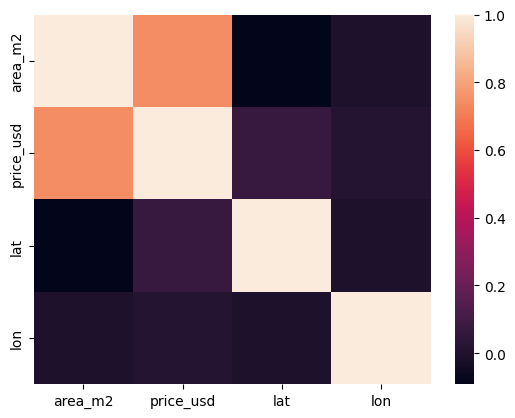

In [261]:
correlation_matrix = df.select_dtypes("number").corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix)

In [262]:
X = df["area_m2"]
y = df["price_usd"]

#### Coding the Model

In [263]:
def b_gradient(y,X,m,b):
    y_pred = m*X+b
    return (-2/len(X)) * np.sum(y-y_pred)


In [264]:
def m_gradient(y,X,m,b):
    y_pred = m*X+b
    return (-2/len(X)) * np.sum(X*(y-y_pred))


In [265]:
def loss_function(y,X,m,b):
    y_pred = m*X+b
    return np.mean((y-y_pred)**2)

In [266]:
def gradient_descent(y,X,learning_rate=0.01,epochs=1000):
    m=0
    b=0
    for i in range(epochs):
        #calculating partial derivatives
        dm=m_gradient(y,X,m,b)
        db=b_gradient(y,X,m,b)
        #updating the values of m and b using the partial derivatives
        m-=learning_rate *dm
        b-=learning_rate*db
        if i%100==0:
            print(f"Epoch {i}:Loss = {loss_function(y,X,m,b)}")
    return m,b


In [267]:
def predict(X, m, b, y=None, verbose=False):
    y_predicted = m * X + b
    
    if verbose and y is not None:
        comparison = pd.DataFrame({"Actual": y, "Predicted": y_predicted})
        print(comparison)
    
    return y_predicted


In [268]:
# Compute min and max from training data
X_min = X_train.min()
X_max = X_train.max()

y_min = y_train.min()
y_max = y_train.max()

# Scale train data to [0,1]
X_train_scaled = (X_train - X_min) / (X_max - X_min)
y_train_scaled = (y_train - y_min) / (y_max - y_min)

# Scale test data using train min and max
X_test_scaled = (X_test - X_min) / (X_max - X_min)
y_test_scaled = (y_test - y_min) / (y_max - y_min)


In [269]:
loss_function(y_train_scaled,X_train_scaled,0,0)

np.float64(0.11475255260645048)

In [270]:
m,b = gradient_descent(y_train_scaled,X_train_scaled)

Epoch 0:Loss = 0.11165174157130214
Epoch 100:Loss = 0.040931959573101834
Epoch 200:Loss = 0.037019642898833756
Epoch 300:Loss = 0.034446551697082155
Epoch 400:Loss = 0.03232837437284208
Epoch 500:Loss = 0.030578209981095856
Epoch 600:Loss = 0.029132041195649248
Epoch 700:Loss = 0.02793706440905389
Epoch 800:Loss = 0.02694964886564275
Epoch 900:Loss = 0.026133742258524318


In [271]:
y_pred_scaled = predict(X_test_scaled, m, b, y_test_scaled, verbose=True)


        Actual  Predicted
2739  0.104167   0.314777
2740  0.166667   0.260316
2741  0.817854   0.442641
2742  0.625306   0.355030
2743  0.423611   0.355030
...        ...        ...
3419  0.131944   0.170337
3420  0.222222   0.210591
3421  0.090278   0.267419
3422  0.138889   0.175073
3423  0.208333   0.229534

[685 rows x 2 columns]


In [279]:
# y_pred_scaled: predicted values in 0-1 range
y_pred_actual = y_pred_scaled * (y_max - y_min) + y_min

# Optional: print a few values
df1 = pd.DataFrame({
    "Predicted_scaled": y_pred_scaled,
    "Predicted_actual": y_pred_actual,
    "Actual": y_test
})


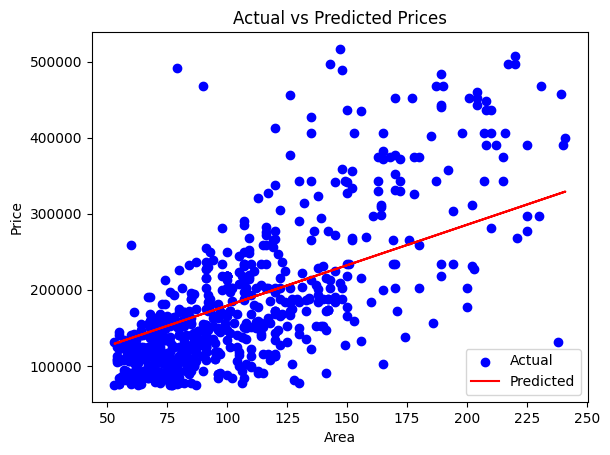

In [281]:
import matplotlib.pyplot as plt

# Scatter of actual test data
plt.scatter(X_test, y_test, color="blue", label="Actual")

# Line of predicted values
plt.plot(X_test, y_pred_actual, color="red", label="Predicted")

plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.show()
